#### 二叉树

1. 节点的高度：节点到叶子节点的最长路径（边长）
2. 节点的深度：根节点到这个节点所经历的边的个数
3. 节点的层数：节点的深度+1
4. 树的高度：根节点的高度

##### 满二叉树

叶子节点都在最底层，且除叶子节点外，所有节点都有左右两个子节点。

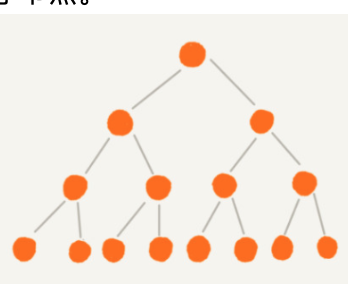

##### 完全二叉树

叶子节点都在最底下两层，最后一层的叶子节点都是靠左排列，除了最后一层，其他层数的节点都达到最大。

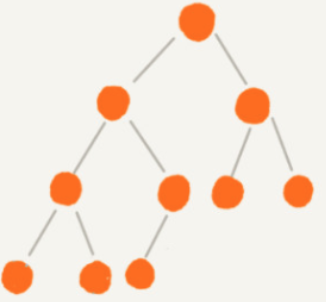

##### 如何存储一颗二叉树
1. 基于指针或者引用的二叉链式存储法
    * 每个节点有三个字段，其中一个存储数据，另外两个是指向左右子节点的指针。
    * 只要拎住根节点，就可以通过左右子节点的指针，把整棵树都串起来
    * 这种存储方式我们比较常用。大部分二叉树代码都是通过这种
     * 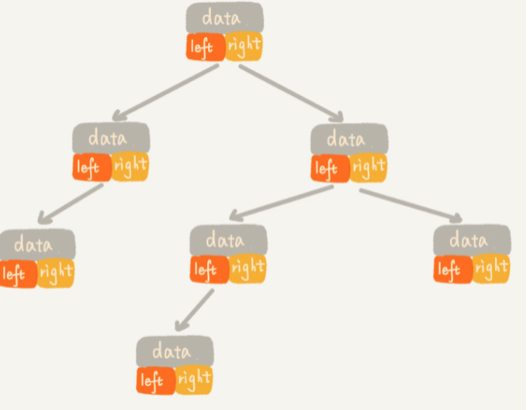

2. 基于数组的顺序存储法
    * 根节点存储在下标 i = 1 的位置（为了方便计算子节点，根节点会存储在下标为 1 的位置），
    * 那左子节点存储在下标 2 * i = 2 的位置，右子节点存储在 2 * i + 1 = 3 的位置。
    * 以此类推，B 节点的左子节点存储在 2 * i = 2 * 2 = 4 的位置，右子节点存储在 2 * i + 1 = 2 * 2 + 1 = 5 的位置。
    * 如果某棵二叉树是一棵完全二叉树，那用数组存储无疑是最节省内存的一种方式。因为数组的存储方式并不需要像链式存储法那样，要存储额外的左右子节点的指针。这也是为什么完全二叉树会单独拎出来的原因，也是为什么完全二叉树要求最后一层的子节点都靠左的原因。
    * 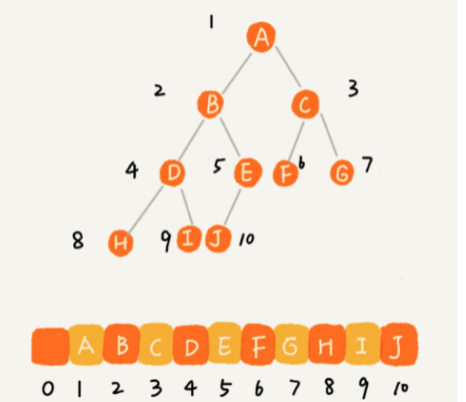


#### 二叉树遍历

* 前序遍历：对于树中的任意节点来说，先打印这个节点，然后再打印它的左子树，最后打印它的右子树。
* 中序遍历：对于树中的任意节点来说，先打印它的左子树，然后再打印它本身，最后打印它的右子树。
  * `二叉搜索树，中序遍历的结果是 有序的`
* 后序遍历：对于树中的任意节点来说，先打印它的左子树，然后再打印它的右子树，最后打印这个节点本身。

时间复杂度：前、中、后序遍历的顺序图，可以看出来，每个节点最多会被访问两次，所以遍历操作的时间复杂度，跟节点的个数 n 成正比，也就是说二叉树遍历的时间复杂度是 O(n)。

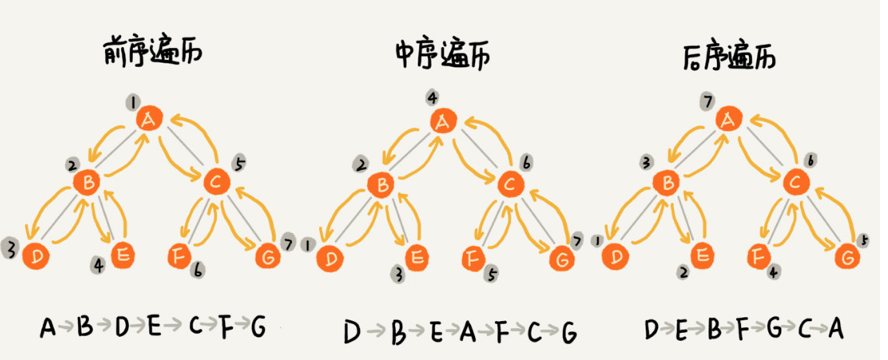


In [ ]:
class traversal:
    def __init__(self):
        self.pre = []
        self.inside = []
        self.subsequent = []

    '''
    二叉树前序遍历
    '''
    def preTraversal(self, root: node):
        if root == None:
            return
        self.pre.append(root.v)
        self.preTraversal(root.left)
        self.preTraversal(root.right)

    '''
    二叉树中序遍历
    '''
    def inTraversal(self, root: node):
        if root == None:
            return
        self.inTraversal(root.left)
        self.inside.append(root.v)
        self.inTraversal(root.right)

    '''
    二叉树后序遍历
    '''
    def subsequentTraversal(self, root: node):
        if root == None:
            return
        self.subsequentTraversal(root.left)
        self.subsequentTraversal(root.right)
        self.subsequent.append(root.v)

给定一组数据，比如 1，3，5，6，9，10。你来算算，可以构建出多少种不同的二叉树？
-- 完全二叉树，可以用数组存储，组合方式就是 n!

我们讲了三种二叉树的遍历方式，前、中、后序。实际上，还有另外一种遍历方式，也就是按层遍历，你知道如何实现吗？
-- 图的广度优先遍历

#### 二叉查找树

在树中的任意一个节点，其左子树中的每个节点的值，都要小于这个节点的值，而右子树节点的值都大于这个节点的值。查找、插入、删除等很多操作的时间复杂度都跟树的高度成正比。

时间复杂度：两个极端情况的时间复杂度分别是 O(n) 和 O(logn)，分别对应二叉树退化成链表的情况和完全二叉树。

散列表的插入、删除、查找操作的时间复杂度可以做到常量级的 O(1)，非常高效。而二叉查找树在比较平衡的情况下，插入、删除、查找操作时间复杂度才是 O(logn)，相对散列表，好像并没有什么优势，那我们为什么还要用二叉查找树呢？
1. 第一，散列表中的数据是无序存储的，如果要输出有序的数据，需要先进行排序。而对于二叉查找树来说，我们只需要中序遍历，就可以在 O(n) 的时间复杂度内，输出有序的数据序列。
2. 第二，散列表扩容耗时很多，而且当遇到散列冲突时，性能不稳定，尽管二叉查找树的性能不稳定，但是在工程中，我们最常用的平衡二叉查找树的性能非常稳定，时间复杂度稳定在 O(logn)。
3. 第三，笼统地来说，尽管散列表的查找等操作的时间复杂度是常量级的，但因为哈希冲突的存在，这个常量不一定比 logn 小，所以实际的查找速度可能不一定比 O(logn) 快。加上哈希函数的耗时，也不一定就比平衡二叉查找树的效率高。
4. 第四，散列表的构造比二叉查找树要复杂，需要考虑的东西很多。比如散列函数的设计、冲突解决办法、扩容、缩容等。平衡二叉查找树只需要考虑平衡性这一个问题，而且这个问题的解决方案比较成熟、固定。
5. 最后，为了避免过多的散列冲突，散列表装载因子不能太大，特别是基于开放寻址法解决冲突的散列表，不然会浪费一定的存储空间。


In [ ]:
'''
104. Maximum Depth of Binary Tree Easy

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        def dfs(node, depth):
            if not node: return depth
            return max(dfs(node.left, depth+1), dfs(node.right, depth+1))
        return dfs(root,0)
        


In [ ]:
'''
112. Path Sum Easy

Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.
'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        if not root:
            return False
        
        # 叶子节点的值 == targetSum - pathSum
        if not root.left and not root.right:
            return targetSum == root.val   

        if self.hasPathSum(root.left, targetSum-root.val):
            return True
        return self.hasPathSum(root.right, targetSum-root.val)
        
        

In [ ]:
'''
98. Validate Binary Search Tree Medium

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left 
subtree
 of a node contains only nodes with keys less than the node's key.
The right subtree of a node contains only nodes with keys greater than the node's key.
Both the left and right subtrees must also be binary search trees.

'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        prev = None

        def helper_inorder(node) -> bool:
            nonlocal prev
            if not node:
                return True
            if not helper_inorder(node.left):
                return False
            # 中序遍历，当前节点必须要大于前一个遍历的节点的值
            if prev and prev.val >= node.val:
                return False
            # 遍历右子树，前一个节点 -> 当前节点
            prev = node
            return helper_inorder(node.right)
            
        return helper_inorder(root)
        


    
    def isValidBST_inorder(self, root: Optional[TreeNode]) -> bool:
        inorder = self.helper_inorder_array(root)
        return inorder == list(sorted(set(inorder))) # 数据量多的情况下，时间复杂度高

    def helper_inorder_array(self, root) -> []:
        if not root:
            return []
        return self.helper(root.left) + [root.val] + self.helper(root.right) # 内存消耗大，且 [root.val] 申请大量零碎的内存空间
 
        

In [ ]:
'''
235. Lowest Common Ancestor of a Binary Search Tree Medium

Given a binary search tree (BST), find the lowest common ancestor (LCA) node of two given nodes in the BST.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        # 二叉搜索树，左子树的值 < root, 右子树的值 > root
        # if q > r && p > r，公共子树在右子树上
        # if q < r && p < r，公共子树在左子树上
        # 否则，p、q 一个在左子树上，一个在右子树上，公共父节点只可能会是 root
        if not root:
            return None
        if p.val <  root.val > q.val:
            return self.lowestCommonAncestor(root.left, p,q)
        if p.val > root.val < q.val:
            return self.lowestCommonAncestor(root.right, p,q)
        return root
        
        

In [ ]:
'''
236. Lowest Common Ancestor of a Binary Tree Medium

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if root in (None, p, q):
            return root

        # 如果 p、q 分别在左、由子树，则 LCA 为 root
        # 如果 p、q 都在 左/右子树，则不需要再去 右/左子树查找
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        
        return root if left and right else left or right
